In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

In [ ]:
imgpath="/content/mylovesrkonly.jpg"
image=cv2.imread(imgpath)
image

array([[[ 49,  47,  47],
        [ 51,  49,  49],
        [ 49,  49,  49],
        ...,
        [ 45,  85, 120],
        [ 53,  93, 128],
        [ 68, 108, 143]],

       [[ 48,  46,  46],
        [ 51,  49,  49],
        [ 49,  49,  49],
        ...,
        [ 57,  97, 132],
        [ 60, 100, 135],
        [ 65, 105, 140]],

       [[ 48,  46,  46],
        [ 50,  48,  48],
        [ 48,  48,  48],
        ...,
        [ 68, 108, 143],
        [ 67, 107, 142],
        [ 66, 106, 141]],

       ...,

       [[205, 207, 215],
        [204, 207, 212],
        [204, 206, 214],
        ...,
        [137, 156, 171],
        [126, 142, 159],
        [137, 156, 171]],

       [[246, 249, 254],
        [246, 249, 253],
        [245, 248, 253],
        ...,
        [236, 248, 255],
        [219, 231, 241],
        [241, 253, 255]],

       [[251, 254, 255],
        [251, 255, 255],
        [251, 254, 255],
        ...,
        [247, 253, 255],
        [246, 252, 255],
        [246, 252, 255]]

In [ ]:
type(image)

numpy.ndarray

In [ ]:
image.shape
# imgpath = "/content/mylovesrkonly.jpg"
# image = cv2.imread(imgpath)

# # Check if the image was loaded successfully
# if image is None:
#   print(f"Error: Could not load image from {imgpath}.")
#   print("Please check the file path, permissions, and file integrity.")
# else:
#   # Proceed with image processing
#   print(f"Image loaded successfully from {imgpath}.")
#   print(f"Image shape: {image.shape}")

(1129, 736, 3)

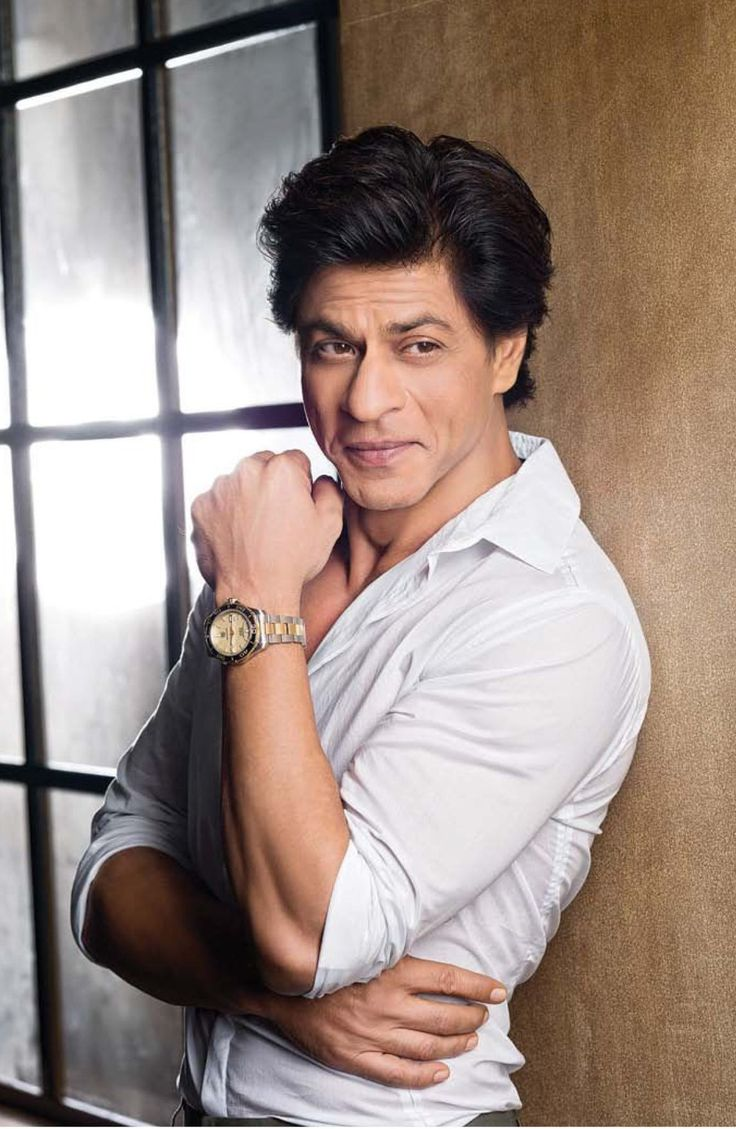

In [ ]:

from google.colab.patches import cv2_imshow
cv2_imshow(image)

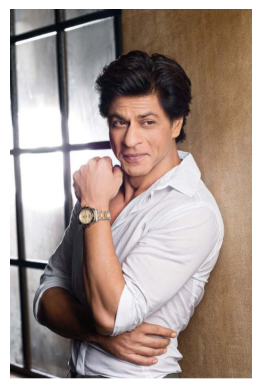

In [ ]:
# resized_image = cv2.resize(img, (10, 10))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
scale_percent = 50  # Resize to 50% of the original size
width = int(image.shape[1] * scale_percent / 100)
height = int(image.shape[0] * scale_percent / 100)
resized_image = cv2.resize(image, (width, height), interpolation=cv2.INTER_AREA)

plt.imshow(resized_image)
plt.axis('off')
plt.show()
# The blue tint happens because OpenCV loads images in BGR format, but Matplotlib expects RGB format for proper color display. You need to convert BGR to RGB before displaying the image.

# Solution: Convert BGR to RGB using cv2.cvtColor()

In [ ]:
image.shape

(1129, 736, 3)

In [ ]:
print(image[0,0])
print(image[0,700])
print(image[1000,0])
print(image[1128,700])

[47 47 49]
[124  90  53]
[180 183 188]
[255 250 244]


In [ ]:
# import matplotlib.pyplot as plt

# # Define the pixel coordinates
# pixel_row = 600
# pixel_col = 400

# # Extract the pixel color
# pixel_color = image[pixel_row, pixel_col]

# # Create a small image with the pixel color
# pixel_image = np.zeros((1, 1, 3), dtype=np.uint8)  # Create a 1x1x3 image
# pixel_image[0, 0] = pixel_color  # Set the pixel color

# # Display the pixel image
# plt.imshow(pixel_image)
# plt.title(f"Pixel ({pixel_row}, {pixel_col}) Color")
# plt.axis('off')
# plt.show()

# # Print the pixel color values
# print(f"Pixel Color (RGB): {pixel_color}")

In [ ]:
blue=image[:,:,0]
green=image[:,:,1]
red=image[:,:, 2]

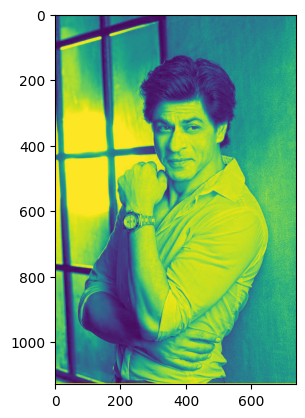

In [ ]:
plt.imshow(blue)
# plt.imshow(green)
# plt.imshow(red)
# plt.imshow(image)

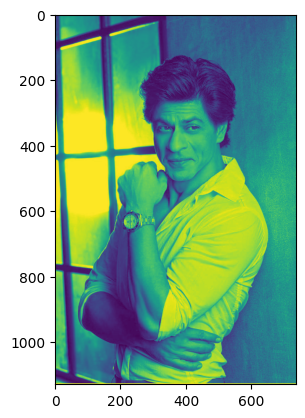

In [ ]:
plt.imshow(green)

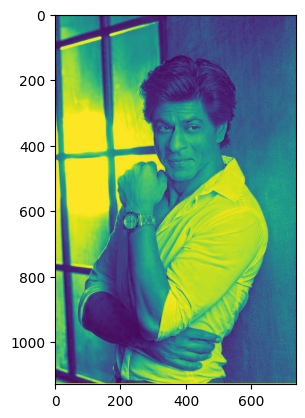

In [ ]:
plt.imshow(red)

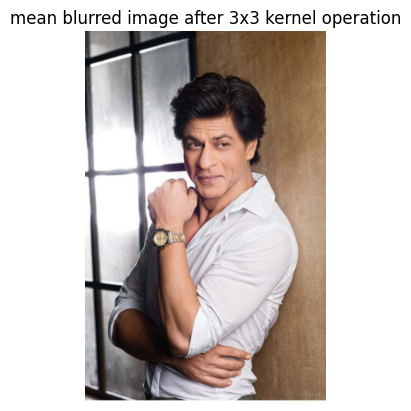

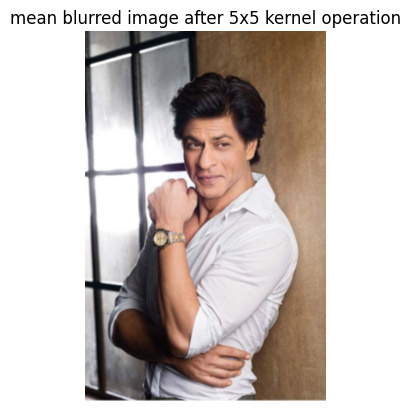

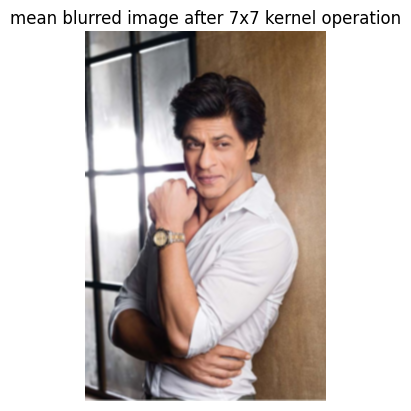

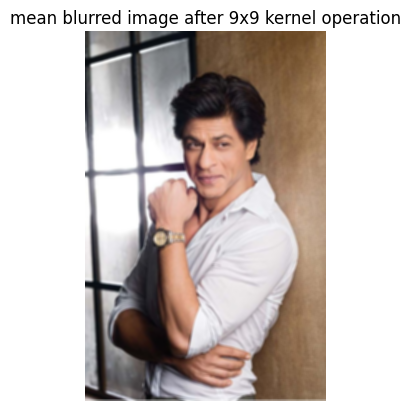

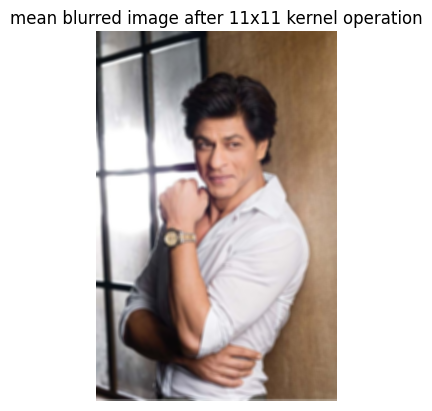

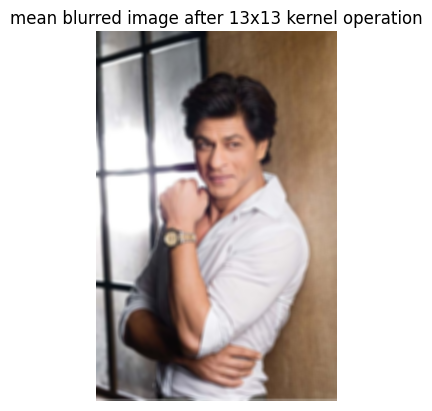

In [ ]:
def meankernel(size):
  mk=np.ones((size,size),dtype=np.float32)/(size*size)
  return mk

for size in range(3, 14, 2):
  blurimg=cv2.filter2D(image, -1, meankernel(size))
  plt.figure()
  plt.imshow(blurimg)
  plt.title(f'mean blurred image after {size}x{size} kernel operation')
  plt.axis('off')
  plt.show()

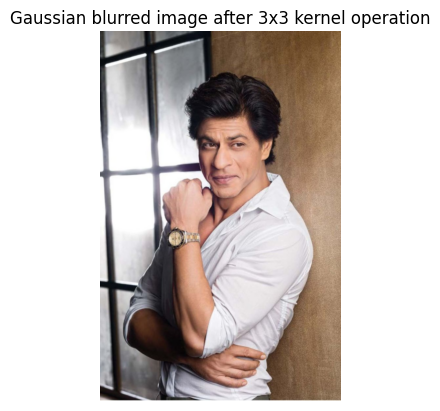

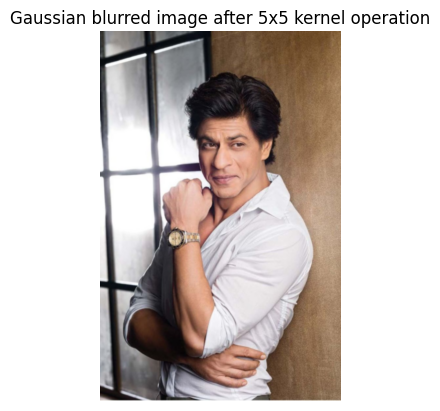

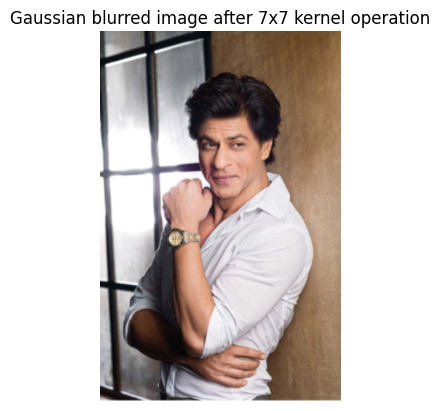

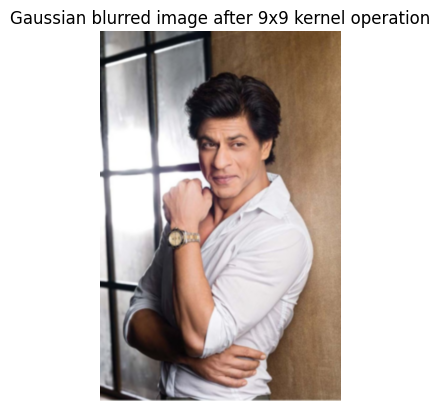

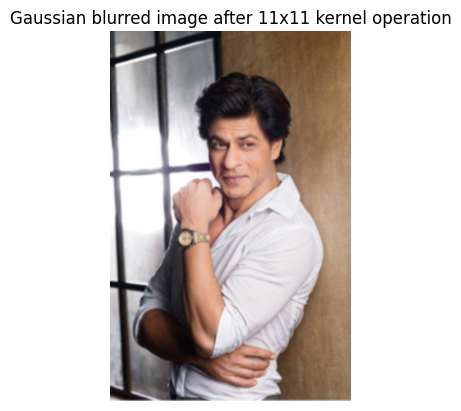

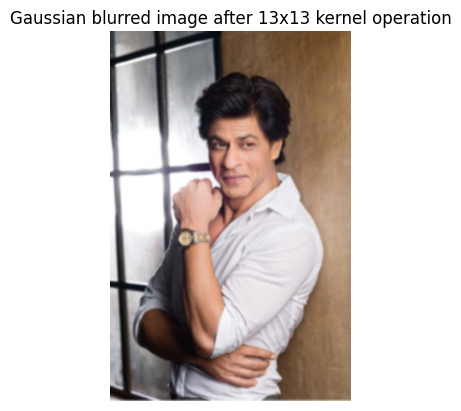

In [ ]:
for size in range(3, 14, 2):
  blurimg=cv2.GaussianBlur(image, (size, size), 0)
  plt.figure()
  plt.imshow(blurimg)
  plt.title(f'Gaussian blurred image after {size}x{size} kernel operation')
  plt.axis('off')
  plt.show()

In [ ]:
image.ravel().shape


(2492832,)

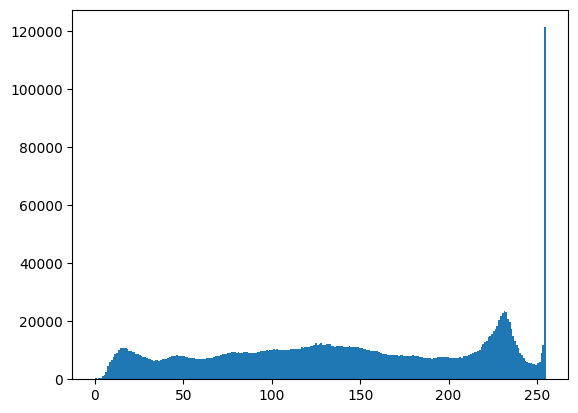

In [ ]:
plt.hist(image.ravel(), bins=256, range=[0, 255])
plt.show()

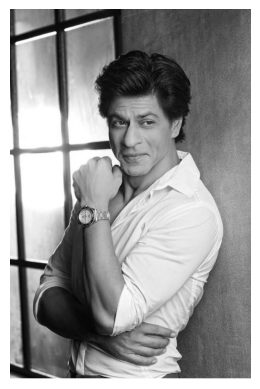

In [ ]:
gray=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.show()

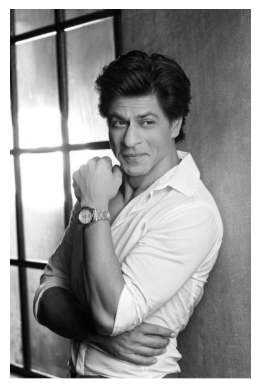

In [ ]:
blurred=cv2.GaussianBlur(gray, (3,3), 0)
plt.imshow(blurred, cmap='gray')
plt.axis('off')
plt.show()

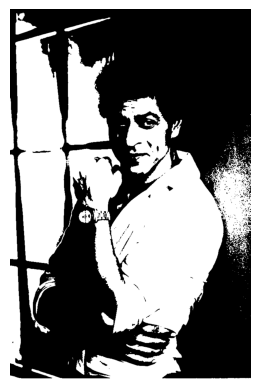

In [ ]:
T, thresh = cv2.threshold(blurred, 150, 255, cv2.THRESH_BINARY)
plt.imshow(thresh, cmap='gray')
plt.axis('off')
plt.show()

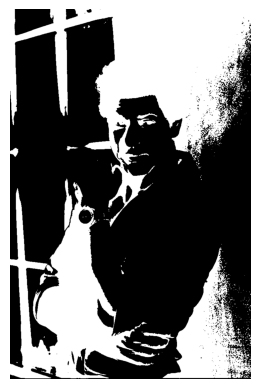

In [ ]:
T, threshinv = cv2.threshold(blurred, 110, 255, cv2.THRESH_BINARY_INV)
plt.imshow(threshinv, cmap='gray')
plt.axis('off')
plt.show()

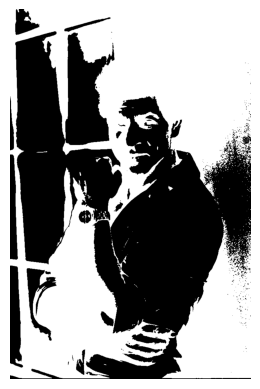

In [ ]:
(T, otsu_threshinv) = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
plt.imshow(otsu_threshinv, cmap='Greys_r')
plt.axis("off")
plt.show()
# print("{INFO} OTSU'S THRESHOLDING VALUE:{}".format(T))

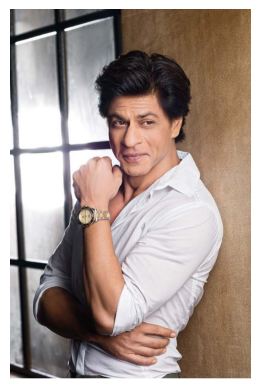

In [ ]:
plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
# img=image[:100, :100]

In [ ]:
# plt.imshow(img)
# plt.axis("off")
# plt.show()

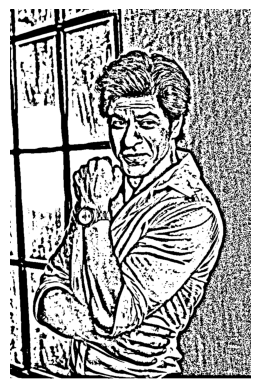

In [ ]:
adp_thresh=cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21, 2)
plt.imshow(adp_thresh, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
sobelx=cv2.Sobel(src=otsu_threshinv, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5)
sobely=cv2.Sobel(src=otsu_threshinv, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5)
sobelxy=cv2.Sobel(src=otsu_threshinv, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5)


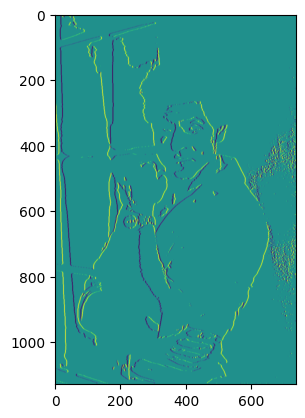

In [ ]:
plt.imshow(sobelx)
# cv2_imshow(sobely)
# cv2_imshow(sobelxy)

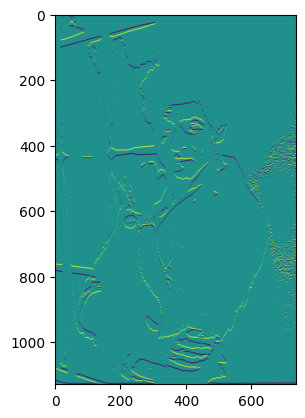

In [ ]:

plt.imshow(sobely)


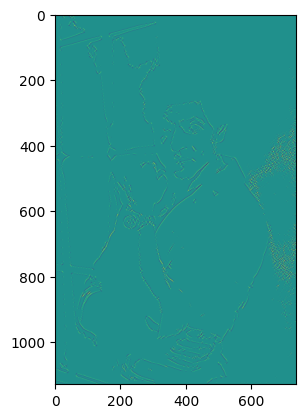

In [ ]:
plt.imshow(sobelxy)

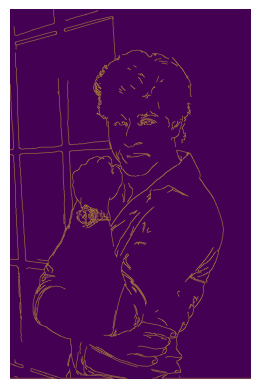

In [ ]:
edges=cv2.Canny(image=blurred, threshold1=100, threshold2=200)
plt.imshow(edges)
plt.axis('off')
plt.show()

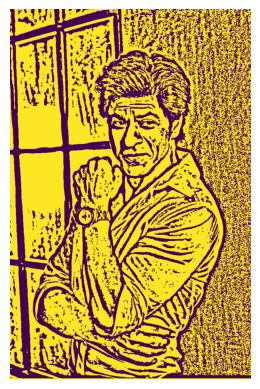

In [ ]:
contour=cv2.findContours(image=adp_thresh, mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_SIMPLE)
plt.imshow(adp_thresh)
plt.axis('off')
plt.show()

In [10]:
import cv2
import matplotlib.pyplot as plt


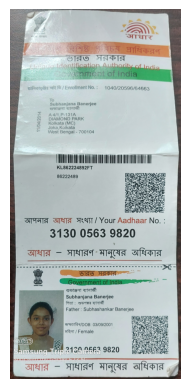

In [11]:
imagepath='/content/AADHAR.jpg'
image=cv2.imread(imagepath)
image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis('off')
plt.show()

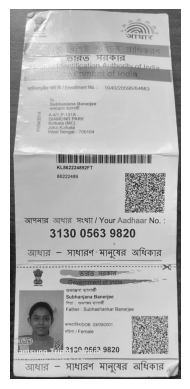

In [12]:
gray_img=cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_img, cmap='gray')
plt.axis('off')
plt.show()

In [13]:
# custom_config=r'--oem 3 --psm 3 1 eng+bn --tessdata.dir "c:\\Program Files\\Tesseract-OCR\\tessdata"'
# Path to Tesseract (if not set in system variables)
# Set the path to the Tesseract executable for Colab
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

# Customize configuration if needed (e.g., for language)
custom_config = r'--oem 3 --psm 3 -l eng+ben'

text = pytesseract.image_to_string(gray_img, config=custom_config)
print(text)
# text=pytesseract.image_to_string(gray_img, config=custom_config)
# print(text)

[ই ভি / Enrollment No.: 1040/20596/64663

To
Subhanjana Banerjee
শুভাজনা ব্যালাজা

A 4/1,P-131A
DIAMOND PARK
Kolkata (MC)

Joka, Kolkata

West Bengal - 700104

11/04/2014

AMMA A |||

KL862224892FT
86222489

Subhanjana Banerjee
পিতা : শুভশক্ষর ব্যানার্জী
Father : Subhashankar Banerjee

1 জন্মতারিখ/)0: 03/09/2001
243 মহিলা /12811818

০.

ন্‌
meh 2.139 OFA 9820

 



In [5]:
pip install pytesseract

In [8]:
import pytesseract

In [8]:
!apt-get install tesseract-ocr
!apt-get install libtesseract-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 29 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 2s (2,869 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 124947 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-

In [9]:
!apt-get install tesseract-ocr-eng

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr-eng is already the newest version (1:4.00~git30-7274cfa-1.1).
tesseract-ocr-eng set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


In [15]:
# Ensure Bengali language support
!apt-get install -y tesseract-ocr-ben  # Installs Bengali OCR model

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tesseract-ocr-ben
0 upgraded, 1 newly installed, 0 to remove and 29 not upgraded.
Need to get 516 kB of archives.
After this operation, 870 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-ben all 1:4.00~git30-7274cfa-1.1 [516 kB]
Fetched 516 kB in 1s (419 kB/s)
Selecting previously unselected package tesseract-ocr-ben.
(Reading database ... 125127 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-ben_1%3a4.00~git30-7274cfa-1.1_all.deb ...
Unpacking tesseract-ocr-ben (1:4.00~git30-7274cfa-1.1) ...
Setting up tesseract-ocr-ben (1:4.00~git30-7274cfa-1.1) ...


In [14]:
!tesseract --version

tesseract 4.1.1
 leptonica-1.82.0
  libgif 5.1.9 : libjpeg 8d (libjpeg-turbo 2.1.1) : libpng 1.6.37 : libtiff 4.3.0 : zlib 1.2.11 : libwebp 1.2.2 : libopenjp2 2.4.0
 Found AVX512BW
 Found AVX512F
 Found AVX2
 Found AVX
 Found FMA
 Found SSE
 Found libarchive 3.6.0 zlib/1.2.11 liblzma/5.2.5 bz2lib/1.0.8 liblz4/1.9.3 libzstd/1.4.8


In [15]:
text

'[ই ভি / Enrollment No.: 1040/20596/64663\n\nTo\nSubhanjana Banerjee\nশুভাজনা ব্যালাজা\n\nA 4/1,P-131A\nDIAMOND PARK\nKolkata (MC)\n\nJoka, Kolkata\n\nWest Bengal - 700104\n\n11/04/2014\n\nAMMA A |||\n\nKL862224892FT\n86222489\n\nSubhanjana Banerjee\nপিতা : শুভশক্ষর ব্যানার্জী\nFather : Subhashankar Banerjee\n\n1 জন্মতারিখ/)0: 03/09/2001\n243 মহিলা /12811818\n\n০.\n\nন্\u200c\nmeh 2.139 OFA 9820\n\n \n\x0c'

In [16]:
import keras_ocr
import matplotlib.pyplot as plt


In [19]:
pip install keras_ocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 83.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 969.6/969.6 kB 59.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 5.2 MB/s eta 0:00:00


In [2]:
pipeline=keras_ocr.pipeline.Pipeline()
# images={keras_ocr.tools.read(image) for image in ['AADHAR.jpg']}
images = [keras_ocr.tools.read(image) for image in ['/content/AADHAR.jpg']]
# prediction=pipeline.recognize(images)


Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


In [3]:
# !pip install keras-ocr==0.8.9
# !pip install tensorflow==2.12.0

import keras_ocr
import matplotlib.pyplot as plt

pipeline = keras_ocr.pipeline.Pipeline()  # Initialize the pipeline

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


In [4]:
prediction_groups=pipeline.recognize(images)



3/3 [==============================] - 18s 4s/step


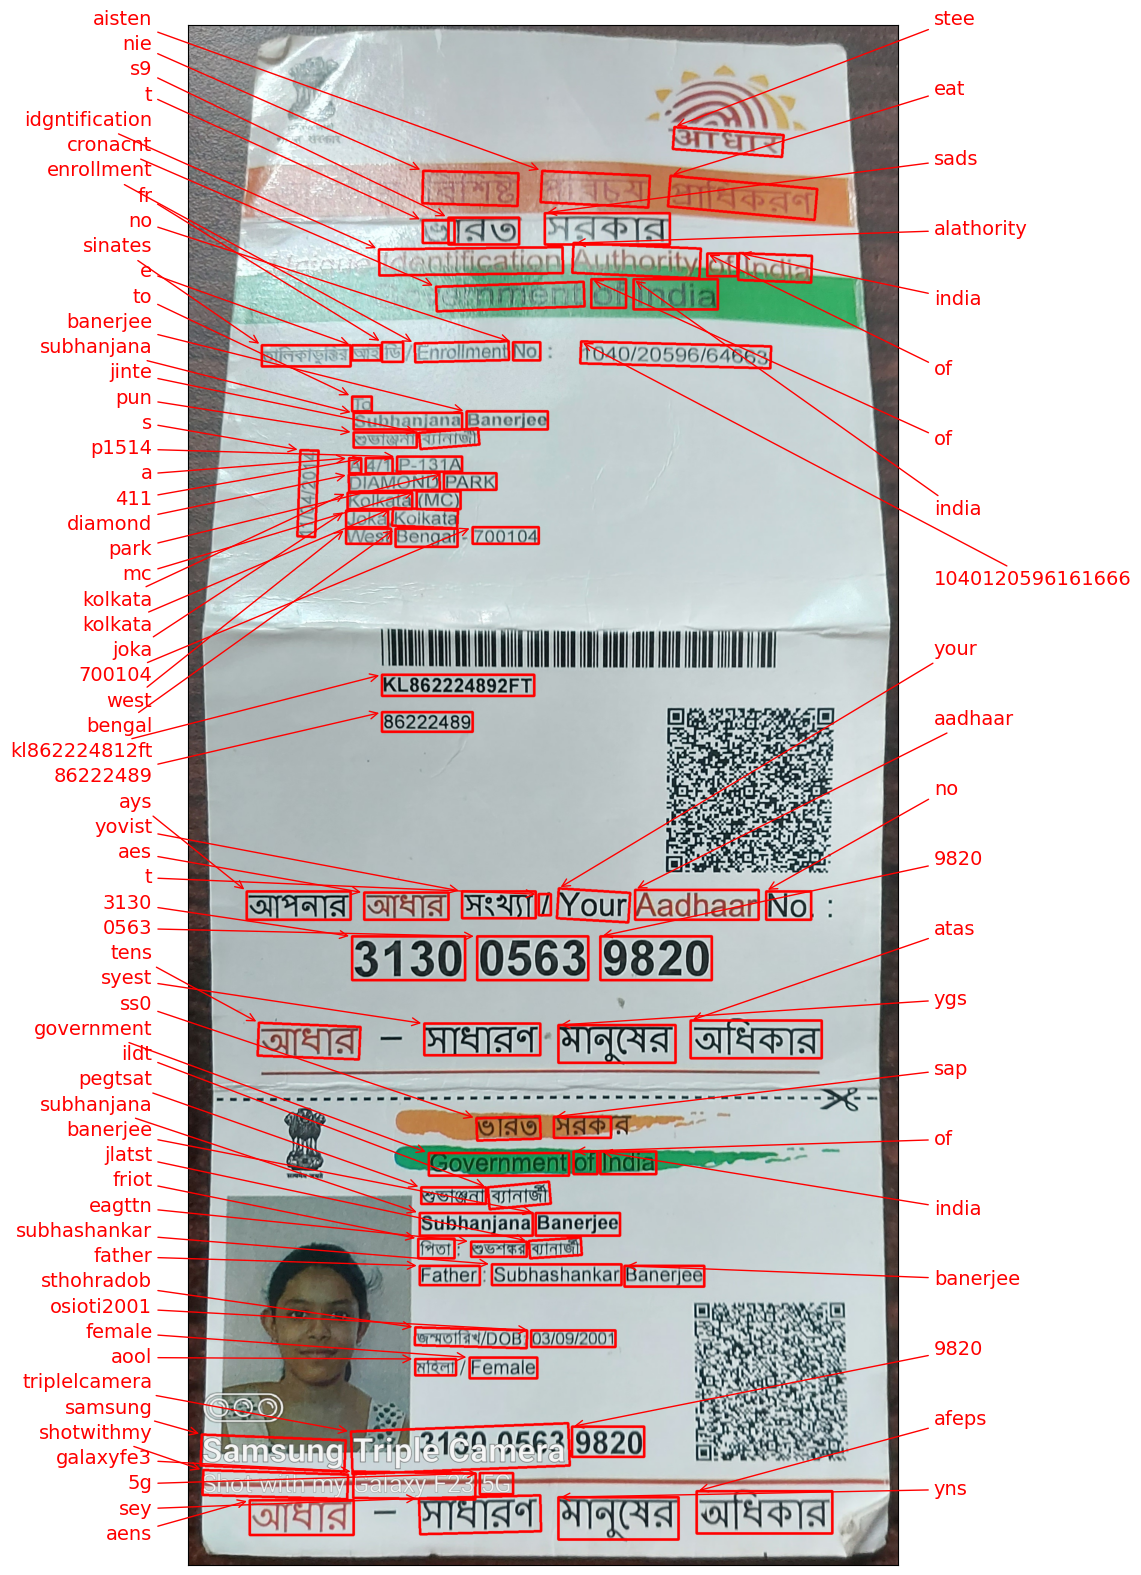

In [17]:
# if len(images) == 1:
#   axs = [axs]

# fig, axs = plt.subplots(nrows=len(images), figsize=(10, 20))
# for ax, image, predictions in zip(axs, images, prediction_groups):
#     keras_ocr.tools.drawAnnotations(image=image, predictions=predictions, ax=ax)
# plt.show()
# Create subplots with the correct number of rows and handle single image case
fig, axs = plt.subplots(nrows=len(images), figsize=(10, 20))

# If there's only one image, axs is not iterable, so we wrap it in a list
if len(images) == 1:
  axs = [axs]

# Now iterate through the images and their predictions
for ax, image, predictions in zip(axs, images, prediction_groups):
    keras_ocr.tools.drawAnnotations(image=image, predictions=predictions, ax=ax)

plt.show()

In [6]:
# len(prediction_groups)
prediction_groups

[[('stee',
   array([[1287.8882 ,  270.26892],
          [1576.7201 ,  291.6639 ],
          [1572.4369 ,  349.48895],
          [1283.605  ,  328.09396]], dtype=float32)),
  ('nie',
   array([[622.40625, 386.2969 ],
          [874.4007 , 392.9283 ],
          [872.1259 , 479.3713 ],
          [620.1315 , 472.7399 ]], dtype=float32)),
  ('aisten',
   array([[ 937.90283,  386.0753 ],
          [1222.2549 ,  399.9461 ],
          [1218.1783 ,  483.51633],
          [ 933.8263 ,  469.6455 ]], dtype=float32)),
  ('eat',
   array([[1277.4493 ,  399.38455],
          [1665.7954 ,  434.68875],
          [1658.3818 ,  516.23773],
          [1270.0358 ,  480.9336 ]], dtype=float32)),
  ('sads',
   array([[ 944.2969 ,  498.04688],
          [1275.     ,  498.04688],
          [1275.     ,  581.71875],
          [ 944.2969 ,  581.71875]], dtype=float32)),
  ('s9',
   array([[689.2969 , 510.     ],
          [876.5625 , 510.     ],
          [876.5625 , 581.71875],
          [689.2969 , 581.71875]

In [19]:
pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 42.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 60.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 66.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42

In [20]:
import easyocr

Extracted Text:
Text: সধ্া২ (Confidence: 0.25)
Text: |711*3, (Confidence: 0.08)
Text: গাঘচয় (Confidence: 0.08)
Text: প্রাধিকরণ (Confidence: 0.84)
Text: ারত (Confidence: 0.47)
Text: সরকার (Confidence: 0.85)
Text: Irtc7lification Authority of India (Confidence: 0.07)
Text: |/|17|1@[[( 0[Ilinda (Confidence: 0.00)
Text: তালিকাডুক্তির আই ডি (Confidence: 0.54)
Text: Enrollment No. (Confidence: 0.52)
Text: 1040/20596/64663 (Confidence: 0.91)
Text: T0 (Confidence: 0.84)
Text: Subhanjalla Banerjee (Confidence: 0.29)
Text: শুভাঞজনা ব্যানা৩ (Confidence: 0.54)
Text: A 4/1,P-131^ (Confidence: 0.38)
Text: DIAMOND PARK (Confidence: 0.57)
Text: gঁ (Confidence: 0.32)
Text: yokkata (kata (Confidence: 0.17)
Text: West Bengal (Confidence: 0.70)
Text: 700104 (Confidence: 0.94)
Text: KL862224892FT (Confidence: 0.79)
Text: 86222489 (Confidence: 1.00)
Text: আপনার আধার (Confidence: 0.81)
Text: সংখ্যা / Your Aadhaar No. (Confidence: 0.50)
Text: ! (Confidence: 0.03)
Text: 3130 0563 9820 (Confidence: 1.00)
Text:

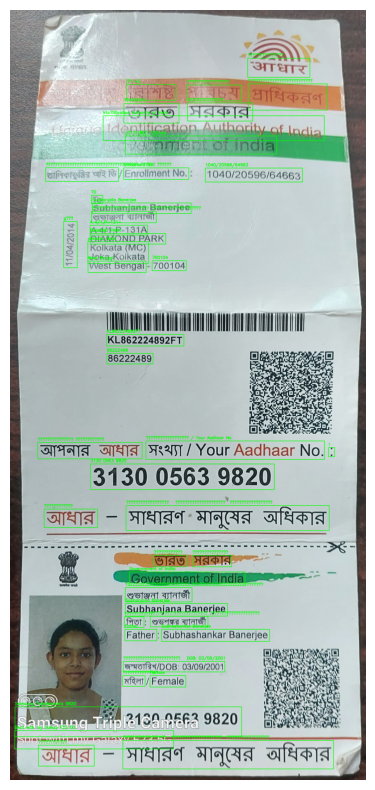

In [2]:
# !pip install --upgrade torch torchvision torchaudio  # Upgrade PyTorch and related libraries

import easyocr
import cv2
import matplotlib.pyplot as plt
import numpy as np # Import numpy explicitly
import torch  # Import torch explicitly


# Load the OCR Reader (Enable Bengali + English)
reader = easyocr.Reader(['en', 'bn'], gpu=False)  # Use GPU=True if you have GPU support

# Read the Image
img_path = "/content/AADHAR.jpg"
image = cv2.imread(img_path)

# Convert Image to RGB (Optional for Better OCR)
# image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Perform OCR
results = reader.readtext(image)

# Display OCR Results
print("Extracted Text:")
for (bbox, text, prob) in results:
    print(f"Text: {text} (Confidence: {prob:.2f})")

# Draw Bounding Boxes on Image
for (bbox, text, prob) in results:
    (top_left, top_right, bottom_right, bottom_left) = bbox
    top_left = tuple(map(int, top_left))
    bottom_right = tuple(map(int, bottom_right))

    # Draw rectangle
    cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)

    # Put detected text
    cv2.putText(image, text, (top_left[0], top_left[1] - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

# Display the Processed Image
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

In [4]:
confidence_threshold=.80
filtered_text=""
for text in results:
  bounding_box, recognized_text, confidence=text
  if confidence>confidence_threshold:
    filtered_text+=recognized_text+" "
print(filtered_text)

প্রাধিকরণ সরকার 1040/20596/64663 T0 700104 86222489 আপনার আধার 3130 0563 9820 আধার ভার৩ শুভাঞ্জনা ব্যানার্জী পিতা Father মহিলা Female আধার 


In [8]:
filtered_text

'প্রাধিকরণ সরকার 1040/20596/64663 T0 700104 86222489 আপনার আধার 3130 0563 9820 আধার ভার৩ শুভাঞ্জনা ব্যানার্জী পিতা Father মহিলা Female আধার '